In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"oraashush","key":"Id9ff2e4a819ba7082790c7e88f114f74"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Creating a dataset directory
!mkdir -p ./datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

In [ ]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo -p /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

%cd /datasets/arjunprasadsarkhel/2021-olympics-in-tokyo
# !unzip

!unzip /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/2021-olympics-in-tokyo.zip -d /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo
!ls


Dataset URL: https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo
License(s): CC-BY-SA-4.0
  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 47.7MB/s]
[Errno 2] No such file or directory: '/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo'
/content
Archive:  /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/2021-olympics-in-tokyo.zip
  inflating: /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.xlsx  
  inflating: /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Coaches.xlsx  
  inflating: /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/EntriesGender.xlsx  
  inflating: /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.xlsx  
  inflating: /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Teams.xlsx  
datasets  sample_data


In [ ]:
import pandas as pd
import os

# The folder path
directory = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo'

# Display the names of the files in the folder
files = os.listdir(directory)
print("Files in the folder:", files)

# Conversion from Excel files to CSV
for file in files:
    if file.endswith('.xlsx'):
        xlsx_path = os.path.join(directory, file)
        csv_path = os.path.join(directory, file.replace('.xlsx', '.csv'))
        try:
            # Reading the Excel file
            df = pd.read_excel(xlsx_path)
            # Converting the data to CSV
            df.to_csv(csv_path, index=False)
            print(f'convert- {file} to-{csv_path}')
        except Exception as e:
            print(f"Error converting the file{file}: {e}")

# Display the contents of the folder after the conversion
!ls /content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

Files in the folder: ['2021-olympics-in-tokyo.zip', 'Medals.xlsx', 'Teams.xlsx', 'EntriesGender.xlsx', 'Athletes.xlsx', 'Coaches.xlsx']


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


convert- Medals.xlsx to-/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv
convert- Teams.xlsx to-/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Teams.csv
convert- EntriesGender.xlsx to-/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/EntriesGender.csv
convert- Athletes.xlsx to-/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv
convert- Coaches.xlsx to-/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Coaches.csv
2021-olympics-in-tokyo.zip  Coaches.csv        EntriesGender.xlsx  Teams.csv
Athletes.csv		    Coaches.xlsx       Medals.csv	   Teams.xlsx
Athletes.xlsx		    EntriesGender.csv  Medals.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
athletes_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'
teams_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Teams.csv'
entries_gender_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/EntriesGender.csv'
coaches_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Coaches.csv'
medals_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'


1.Is there a relationship between a country's GPD and its victory?

In [ ]:
# Setting the path to the CSV file
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'

# Reading the CSV file into a DataFrame
athletes_df = pd.read_csv(csv_file_path)

# Display the first ten lines of the file to understand the structure
print(athletes_df.head())

                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball


In [ ]:
# Install the wbdata package used to download economic data from sources such as the World Bank
!pip install wbdata


In [ ]:
import wbdata
import pandas as pd

# Load the medals data
medals_csv_path = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'
medals_df = pd.read_csv(medals_csv_path)

# Manual mapping from NOC to ISO3 country codes (partial list)
noc_to_iso3 = {
    'United States of America': 'USA',
    "People's Republic of China": 'CHN',
    'Japan': 'JPN',
    'Great Britain': 'GBR',
    'ROC': 'RUS',  # Russia (ROC stands for Russian Olympic Committee)
    'Australia': 'AUS',
    'Netherlands': 'NLD',
    'France': 'FRA',
    'Germany': 'DEU',
    'Italy': 'ITA',
    'Canada': 'CAN',
    'Brazil': 'BRA',
    'New Zealand': 'NZL',
    'Cuba': 'CUB',
    'Hungary': 'HUN',
    'Republic of Korea': 'KOR',
    'Poland': 'POL',
    'Czech Republic': 'CZE',
    'Kenya': 'KEN',
    'Norway': 'NOR',
    'Jamaica': 'JAM',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Denmark': 'DNK',
    'Croatia': 'HRV',
    'Islamic Republic of Iran': 'IRN',
    'Serbia': 'SRB',
    'Belgium': 'BEL',
    'Bulgaria': 'BGR',
    'Slovenia': 'SVN',
    'Uzbekistan': 'UZB',
    'Georgia': 'GEO',
    'Chinese Taipei': 'TWN',
    'Turkey': 'TUR',
    'Greece': 'GRC',
    'Uganda': 'UGA',
    'Ecuador': 'ECU',
    'Ireland': 'IRL',
    'Israel': 'ISR',
    'Qatar': 'QAT',
    'Bahamas': 'BHS',
    'Kosovo': 'XKX',
    'Ukraine': 'UKR',
    'Belarus': 'BLR',
    'Romania': 'ROU',
    'Venezuela': 'VEN',
    'India': 'IND',
    'Hong Kong, China': 'HKG',
    'Philippines': 'PHL',
    'Slovakia': 'SVK',
    'South Africa': 'ZAF',
    'Austria': 'AUT',
    'Egypt': 'EGY',
    'Indonesia': 'IDN',
    'Ethiopia': 'ETH',
    'Portugal': 'PRT',
    'Tunisia': 'TUN',
    'Estonia': 'EST',
    'Fiji': 'FJI',
    'Latvia': 'LVA',
    'Thailand': 'THA',
    'Bermuda': 'BMU',
    'Morocco': 'MAR',
    'Puerto Rico': 'PRI',
    'Colombia': 'COL',
    'Azerbaijan': 'AZE',
    'Dominican Republic': 'DOM',
    'Armenia': 'ARM',
    'Kyrgyzstan': 'KGZ',
    'Mongolia': 'MNG',
    'Argentina': 'ARG',
    'San Marino': 'SMR',
    'Jordan': 'JOR',
    'Malaysia': 'MYS',
    'Nigeria': 'NGA',
    'Bahrain': 'BHR',
    'Saudi Arabia': 'SAU',
    'Lithuania': 'LTU',
    'North Macedonia': 'MKD',
    'Namibia': 'NAM',
    'Turkmenistan': 'TKM',
    'Kazakhstan': 'KAZ',
    'Mexico': 'MEX',
    'Finland': 'FIN',
    'Botswana': 'BWA',
    'Burkina Faso': 'BFA',
    "Côte d'Ivoire": 'CIV',
    'Ghana': 'GHA',
    'Grenada': 'GRD',
    'Kuwait': 'KWT',
    'Republic of Moldova': 'MDA',
    'Syrian Arab Republic': 'SYR'
}

# Map the NOC codes to ISO3
countries_iso3 = medals_df['Team/NOC'].map(noc_to_iso3).dropna().unique().tolist()

# Define the indicators you're interested in
indicators = {
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'FP.CPI.TOTL': 'Inflation, consumer prices (annual %)',
    'SL.UEM.TOTL.ZS': 'Unemployment, total (% of total labor force)',
    'NY.GDP.PCAP.CD': 'GDP per capita (current US$)'
}

# Fetch the data without specifying a date
df = wbdata.get_dataframe(indicators, country=countries_iso3)

# Reset the index for easier viewing
df = df.reset_index()

print(df.head())


     country  date  GDP (current US$)  Inflation, consumer prices (annual %)  \
0  Argentina  2023       6.405914e+11                                    NaN   
1  Argentina  2022       6.311334e+11                                    NaN   
2  Argentina  2021       4.879026e+11                                    NaN   
3  Argentina  2020       3.857405e+11                                    NaN   
4  Argentina  2019       4.477547e+11                                    NaN   

   Unemployment, total (% of total labor force)  GDP per capita (current US$)  
0                                         6.178                  13730.514709  
1                                         6.805                  13650.604629  
2                                         8.736                  10650.860460  
3                                        11.461                   8500.837939  
4                                         9.843                   9963.674162  


In [ ]:
# Conversion of 'Team/NOC' column values ​​to ISO3 codes using the 'noc_to_iso3' map,
# Removing missing values ​​(NaN), then creating a unique list of these codes.
medals_df['Team/NOC'].map(noc_to_iso3).dropna().unique().tolist()

['USA',
 'CHN',
 'JPN',
 'GBR',
 'RUS',
 'AUS',
 'NLD',
 'FRA',
 'DEU',
 'ITA',
 'CAN',
 'BRA',
 'NZL',
 'CUB',
 'HUN',
 'KOR',
 'POL',
 'CZE',
 'KEN',
 'NOR',
 'JAM',
 'ESP',
 'SWE',
 'CHE',
 'DNK',
 'HRV',
 'IRN',
 'SRB',
 'BEL',
 'BGR',
 'SVN',
 'UZB',
 'GEO',
 'TWN',
 'TUR',
 'GRC',
 'UGA',
 'ECU',
 'IRL',
 'ISR',
 'QAT',
 'BHS',
 'XKX',
 'UKR',
 'BLR',
 'ROU',
 'VEN',
 'IND',
 'HKG',
 'PHL',
 'SVK',
 'ZAF',
 'AUT',
 'EGY',
 'IDN',
 'ETH',
 'PRT',
 'TUN',
 'EST',
 'FJI',
 'LVA',
 'THA',
 'BMU',
 'MAR',
 'PRI',
 'COL',
 'AZE',
 'DOM',
 'ARM',
 'KGZ',
 'MNG',
 'ARG',
 'SMR',
 'JOR',
 'MYS',
 'NGA',
 'BHR',
 'SAU',
 'LTU',
 'MKD',
 'NAM',
 'TKM',
 'KAZ',
 'MEX',
 'FIN',
 'BWA',
 'BFA',
 'CIV',
 'GHA',
 'GRD',
 'KWT',
 'MDA',
 'SYR']

In [ ]:
medals_df['converted_country'] = medals_df['Team/NOC'].map(noc_to_iso3).dropna().unique().tolist()
df['converted_country'] = df['country'].map(noc_to_iso3).tolist()

In [ ]:
medals_csv_path = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'
medals_df = pd.read_csv(medals_csv_path)

In [ ]:
# Add the 'converted_country' column to medals_df
medals_df['converted_country'] = medals_df['Team/NOC'].map(noc_to_iso3)

# Add the 'converted_country' column to df
df['converted_country'] = df['country'].map(noc_to_iso3)

# Now perform the merge
agg_df = medals_df.merge(df, left_on='converted_country', right_on='converted_country', how='left')

print(agg_df.head())

   Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     3                       Japan    27      14      17     58   
4     3                       Japan    27      14      17     58   

   Rank by Total converted_country country  date  GDP (current US$)  \
0              1               USA     NaN   NaN                NaN   
1              2               CHN     NaN   NaN                NaN   
2              5               JPN   Japan  2023       4.212945e+12   
3              5               JPN   Japan  2022       4.256411e+12   
4              5               JPN   Japan  2021       5.034621e+12   

   Inflation, consumer prices (annual %)  \
0                                    NaN   
1                                    NaN   
2                             11

In [ ]:
# Saving the rows in agg_df where the value in the 'converted_country' column
# Found in the list of unique values ​​in the 'converted_country' column in df.
agg_df = agg_df[agg_df['converted_country'].isin(df['converted_country'].drop_duplicates().to_list())]

Calculation of correlation between GDP of each country and its winnings:

In [ ]:
# Correlation calculation
agg_df['Total'].corr(agg_df['GDP (current US$)'])

0.6014805308952004

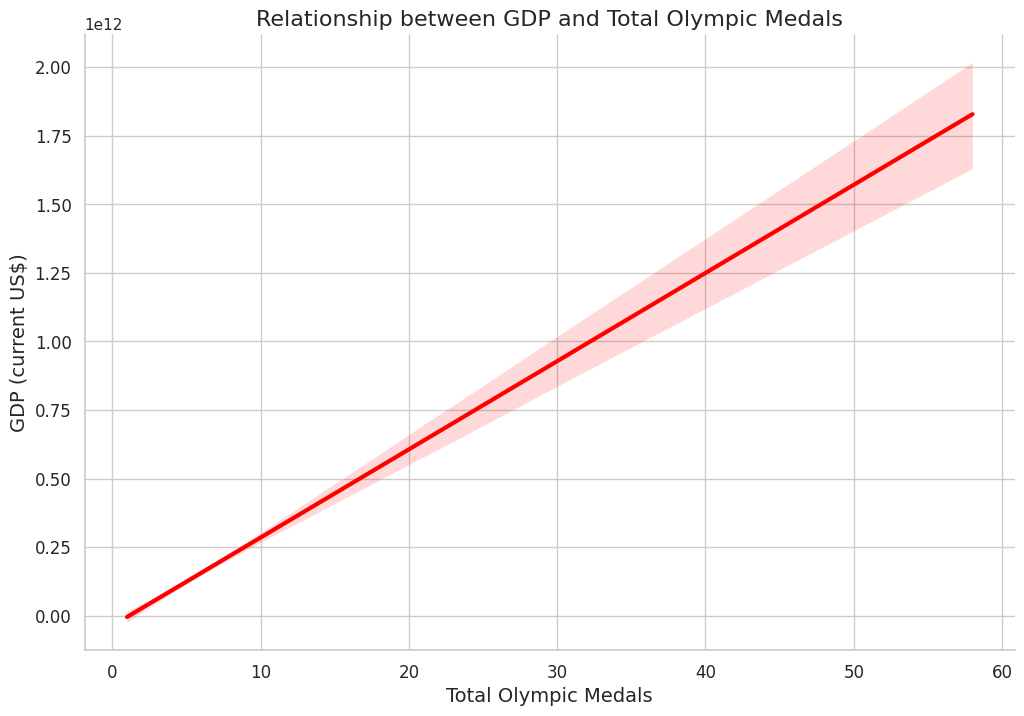

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clear and clean style
sns.set(style="whitegrid")

# Assuming you have your DataFrame agg_df with the columns 'Total' and 'GDP (current US$)'

# Create the regression line plot without scatter points
plt.figure(figsize=(12, 8))
sns.regplot(x='Total', y='GDP (current US$)', data=agg_df, scatter=False, line_kws={'color': 'red', 'lw': 3})

# Add labels and title
plt.xlabel('Total Olympic Medals', fontsize=14)
plt.ylabel('GDP (current US$)', fontsize=14)
plt.title('Relationship between GDP and Total Olympic Medals', fontsize=16)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()





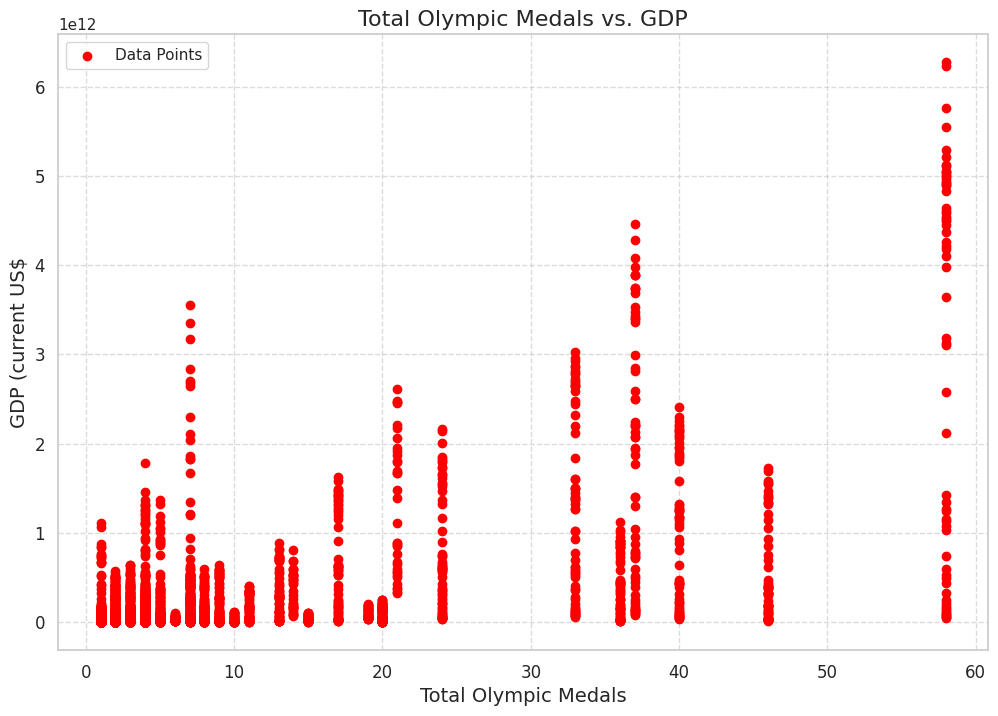

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by GDP
sorted_df = agg_df.sort_values(by='GDP (current US$)')

# Creating a graph with only points
plt.figure(figsize=(12, 8))

# Adding the points only
plt.scatter(sorted_df['Total'], sorted_df['GDP (current US$)'], color='red', label='Data Points', zorder=5)

# Adding labels and title
plt.xlabel('Total Olympic Medals', fontsize=14)
plt.ylabel('GDP (current US$', fontsize=14)
plt.title('Total Olympic Medals vs. GDP', fontsize=16)

# Adjusting the text size of the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid of lines
plt.grid(True, linestyle='--', alpha=0.7)

# Added a legend to explain the different colors
plt.legend()

# Display the plot
plt.show()



In [ ]:
import pandas as pd
import sqlite3
import os

csv_file = None
db_file = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/database.sqlite'
table_name = 'OlympicsData'

if not os.path.exists('./datasets/arjunprasadsarkhel/2021-olympics-in-tokyo'):
    os.makedirs('./datasets/arjunprasadsarkhel/2021-olympics-in-tokyo')

if not os.path.exists(db_file):
    conn = sqlite3.connect(db_file)
    print(f"Database {db_file} created successfully.")
else:
    conn = sqlite3.connect(db_file)
    print(f"Database {db_file} already exists. Replacing data.")

Database ./datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/database.sqlite created successfully.


In [ ]:
import sqlite3
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

DB_PATH = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/database.sqlite'


1. What are the different sports in the Tokyo Olympics 2020 (2021)?

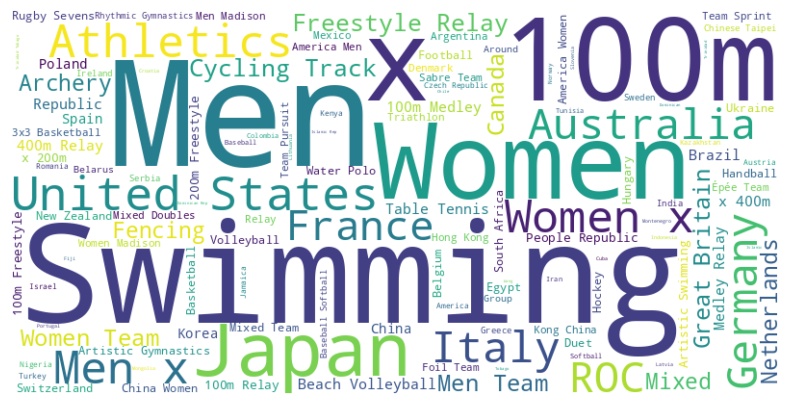

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the file
teams_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Teams.csv'
df = pd.read_csv(teams_csv)

# Create one large string from all the texts in the desired columns
text = ' '.join(df.astype(str).values.flatten())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

How many men and women participated in the Olympics?

In [ ]:
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/EntriesGender.csv'

# Reading the CSV file into a DataFrame
entries_gender_df = pd.read_csv(csv_file_path)


#Calculation of total men and women
male = entries_gender_df["Male"].sum()
female = entries_gender_df["Female"].sum()

print(f"Total male entries: {male}")
print(f"Total female entries: {female}")

Total male entries: 5884
Total female entries: 5432


In [ ]:
import plotly.graph_objects as go

male = 5884
female = 5432

# Creating the chart
fig = go.Figure(data=[go.Pie(labels=['Male', 'Female'], values=[male, female])])
fig.update_traces(hoverinfo='value', textinfo='percent')
fig.update_layout(
    template="seaborn",
    font_family="Rockwell",
    font_size=16,
    title="Male/Female athletes",
    title_font_size=24,
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")
)
fig.show()

Number of athletes by dicsipline:

In [ ]:
# Reading the CSV file into a DataFrame
athletes_csv_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'
df_athletes = pd.read_csv(athletes_csv_path)

# Creating a graph
fig = go.Figure([go.Bar(x=df_athletes['Discipline'].value_counts().index[:20],
                        y=df_athletes['Discipline'].value_counts().values[:20],
                        text=df_athletes['Discipline'].value_counts().values[:20],
                        textposition='auto')
                ]
               )

fig.update_layout(title_text="Top 20 disciplines with the most athletes in the competition:")

fig.show()

Gender distribution per discpline:

In [ ]:
gender_csv_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/EntriesGender.csv'
df_gender = pd.read_csv(gender_csv_path)

fig = go.Figure(data=[
    go.Bar(name='Male', x=df_gender['Discipline'], y=df_gender['Male']),
    go.Bar(name='Female', x=df_gender['Discipline'], y=df_gender['Female']),
])
# Change the bar mode
fig.update_layout(barmode='group', title_text="Gender distribution on each discipline:")
fig.show()

How is the different of distribution between male and female athletes in each discipline?

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Male',
                     x=df_gender['Male'] / df_gender['Total'],
                     y=df_gender['Discipline'],
                     orientation='h'
                    ))

fig.add_trace(go.Bar(name='Female',
                     x=df_gender['Female'] / df_gender['Total'],
                     y=df_gender['Discipline'],
                     orientation='h'
                    ))

fig.update_layout(barmode="relative",
                  width=1000,
                  height=1000,
                  bargap=0.30,
                  title_text="Gender distribution on each discipline",
                  legend_orientation='h')
fig.show()

Olympic gold medal winners: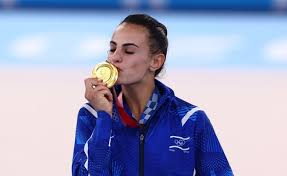

In [ ]:
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'

medals_df = pd.read_csv(csv_file_path)

#Displaying the column names
print(medals_df.columns)

Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')


In [ ]:
# Setting the path to the CSV file
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'

# Reading the CSV file into a DataFrame
medals_df = pd.read_csv(csv_file_path)

# Calculation of the number of gold medals
#Here let's say 'Gold' contains numbers of winners
number_of_gold_medals = medals_df['Gold'].sum()

# Displaying the result
print(f"Number of gold medals won: {number_of_gold_medals}")


Number of gold medals won: 340


The 10 countries with the most medals:

In [ ]:
medals_csv_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Medals.csv'
medals_df = pd.read_csv(medals_csv_path)


# Grouping and counting of medals by country
total_medal = medals_df.groupby('Team/NOC')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

# Calculation of the total of medals for each country
total_medal['Total'] = total_medal['Gold'] + total_medal['Silver'] + total_medal['Bronze']

# Changing the name of the column 'Country' to 'Athletes Count'
total_medal = total_medal.rename(columns={"Country": "Athletes Count"})

# Sorting the data according to the total number of medals in descending order and selecting the first 10 countries
top10medal = total_medal.sort_values(by="Total", ascending=False).head(10)

# Displaying the result
print(top10medal)

# Creating a graph
import plotly.express as px

fig = px.bar(top10medal, x='Team/NOC', y='Total', title="Top 10 Countries with Most Medals",
             labels={'Team/NOC': 'Country', 'Total': 'Total Medals'},
             template="seaborn")

# Display the graph
fig.show()



                      Team/NOC  Gold  Silver  Bronze  Total
90    United States of America    39      41      33    113
64  People's Republic of China    38      32      18     88
70                         ROC    20      28      23     71
33               Great Britain    22      21      22     65
45                       Japan    27      14      17     58
2                    Australia    17       7      22     46
43                       Italy    10      10      20     40
31                     Germany    10      11      16     37
59                 Netherlands    10      12      14     36
29                      France    10      12      11     33


How many gold medals did Israel win?

In [ ]:
israel_gold_medals = medals_df[medals_df['Team/NOC'] == 'Israel']['Gold'].sum()

print(f"Number of gold medals won by Israel: {israel_gold_medals}")

Number of gold medals won by Israel: 2


What is the country (or countrys) with the smallest delegation sent to the Olympics?

In [ ]:
# Setting the path to the CSV file
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'

# Reading the CSV file into a DataFrame
athletes_df = pd.read_csv(csv_file_path)

# Correcting the names of the countries
athletes_df['NOC'] = athletes_df['NOC'].replace(
    {"People's Republic of China": "China",
     "United States of America": "USA"}
)

# Counting the number of athletes in each country
athletes_count = athletes_df['NOC'].value_counts()

# Finding the country with the fewest athletes
smallest_delegation_country = athletes_count.idxmin()
smallest_delegation_count = athletes_count.min()

# Displaying the result
print(f"The country with the smallest delegation is {smallest_delegation_country} with {smallest_delegation_count} athletes.")

# Finding all the countries with the fewest athletes (if we have more then one)
smallest_delegation_countries = athletes_count[athletes_count == athletes_count.min()]

# Displaying the result
print(f"The countries with the smallest delegations are:")
for country, count in smallest_delegation_countries.items():
    print(f"{country}: {count} athletes")



The country with the smallest delegation is Somalia with 2 athletes.
The countries with the smallest delegations are:
Somalia: 2 athletes
Tuvalu: 2 athletes
Brunei Darussalam: 2 athletes
Dominica: 2 athletes
Central African Republic: 2 athletes
Lesotho: 2 athletes
Myanmar: 2 athletes
Bermuda: 2 athletes
Andorra: 2 athletes
Nauru: 2 athletes
Mauritania: 2 athletes
St Vincent and the Grenadines: 2 athletes
United Republic of Tanzania: 2 athletes
Saint Kitts and Nevis: 2 athletes
Marshall Islands: 2 athletes
Vanuatu: 2 athletes
South Sudan: 2 athletes


In [ ]:
athletes_count_sorted = athletes_count.sort_values()

In [ ]:
import plotly.graph_objects as go

#Setting the number of countries with the fewest athletes we want to display
bottom_n = 10

# Creating a bar graph
fig = go.Figure(go.Bar(x=athletes_count_sorted.values[:bottom_n], y=athletes_count_sorted.index[:bottom_n], orientation='h'))

# Updating the design of the graph
fig.update_layout(
    template="seaborn",
    font_family="Rockwell",
    font_size=16,
    title="Nations with Fewest Athletes",
    title_font_size=24,
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"),
    yaxis=dict(autorange="reversed"), # Reverses the order of the y-axis so that the country with the fewest athletes is at the top
    xaxis=dict(range=[min(athletes_count_sorted.values[:bottom_n]) - 1, max(athletes_count_sorted.values[:bottom_n]) + 1]) # Zoom is not on the x-axis range
)

# Update the text displayed when hovering
fig.update_traces(textfont_size=12, hovertemplate='<b>%{y} - %{x} athletes</b><extra></extra>')

# Display the graph
fig.show()


What is the country with the largest delegation sent to the Olympics?

In [ ]:

# Setting the path to the CSV file
csv_file_path = './datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'

# Reading the CSV file into a DataFrame
athletes_df = pd.read_csv(csv_file_path)

# Display the first ten lines of the file to understand the structure
print(athletes_df.head())


                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball


In [ ]:
# Correcting the names of the countries
athletes_df['NOC'] = athletes_df['NOC'].replace(
    {"People's Republic of China": "China",
     "United States of America": "USA"}
)


In [ ]:

# Counting the number of athletes in each country
athletes_count = athletes_df['NOC'].value_counts()

# Finding the country with the most athletes
largest_delegation_country = athletes_count.idxmax()
largest_delegation_count = athletes_count.max()

# display the result
print(f"The country with the largest delegation is {largest_delegation_country} with {largest_delegation_count} athletes.")

The country with the largest delegation is USA with 615 athletes.


In [ ]:
fig = go.Figure(go.Bar(x=athletes_count.values[:10],y=athletes_count.index[:10],orientation='h'))

fig.update_layout(template="seaborn", font_family="Rockwell", font_size=16, title="Nations with most athletes",
                title_font_size=24, hoverlabel=dict(bgcolor="white",font_size=12,font_family="Rockwell"))

fig.update_traces(textfont_size=12, hovertemplate='<b>%{y} - %{x} athletes</b><extra></extra>')

fig.show()

A map showing the number of gymnasts on each continent:

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1633690297522' style='position: relative'>
    <noscript><a href='#'><img alt='Dashboard 1' src='https://public.tableau.com/static/images/20/2021TokyoOlympicGame/Dashboard1/1_rss.png' style='border: none' /></a></noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='2021TokyoOlympicGame/Dashboard1' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/20/2021TokyoOlympicGame/Dashboard1/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1633690297522');
    var vizElement = divElement.getElementsByTagName('object')[0];
    if (divElement.offsetWidth > 800) {
        vizElement.style.width='1000px';
        vizElement.style.height='827px';
    } else if (divElement.offsetWidth > 500) {
        vizElement.style.width='1000px';
        vizElement.style.height='827px';
    } else {
        vizElement.style.width='100%';
        vizElement.style.height='1227px';
    }
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>


What is the average age of each athlete in each sport?

Average Age per Sport:
               Discipline        age
18             Equestrian  42.167598
32               Shooting  34.776892
8        Beach Volleyball  34.521127
6       Baseball/Softball  34.350282
21                   Golf  34.268817
37           Table Tennis  33.899281
14  Cycling Mountain Bike  33.080645
31                Sailing  33.035573
41              Triathlon  32.989130
13     Cycling BMX Racing  32.972222
35                Surfing  32.805556
39                 Tennis  32.628049
15           Cycling Road  32.496552
12  Cycling BMX Freestyle  32.400000
22               Handball  32.334711
25                 Karate  32.283333
19                Fencing  31.915493
7              Basketball  31.761702
29                 Rowing  31.726619
23                 Hockey  31.573460
42             Volleyball  31.475936
0          3x3 Basketball  31.392857
30           Rugby Sevens  31.258964
27      Modern Pentathlon  31.214286
4               Athletics  31.093675
43             

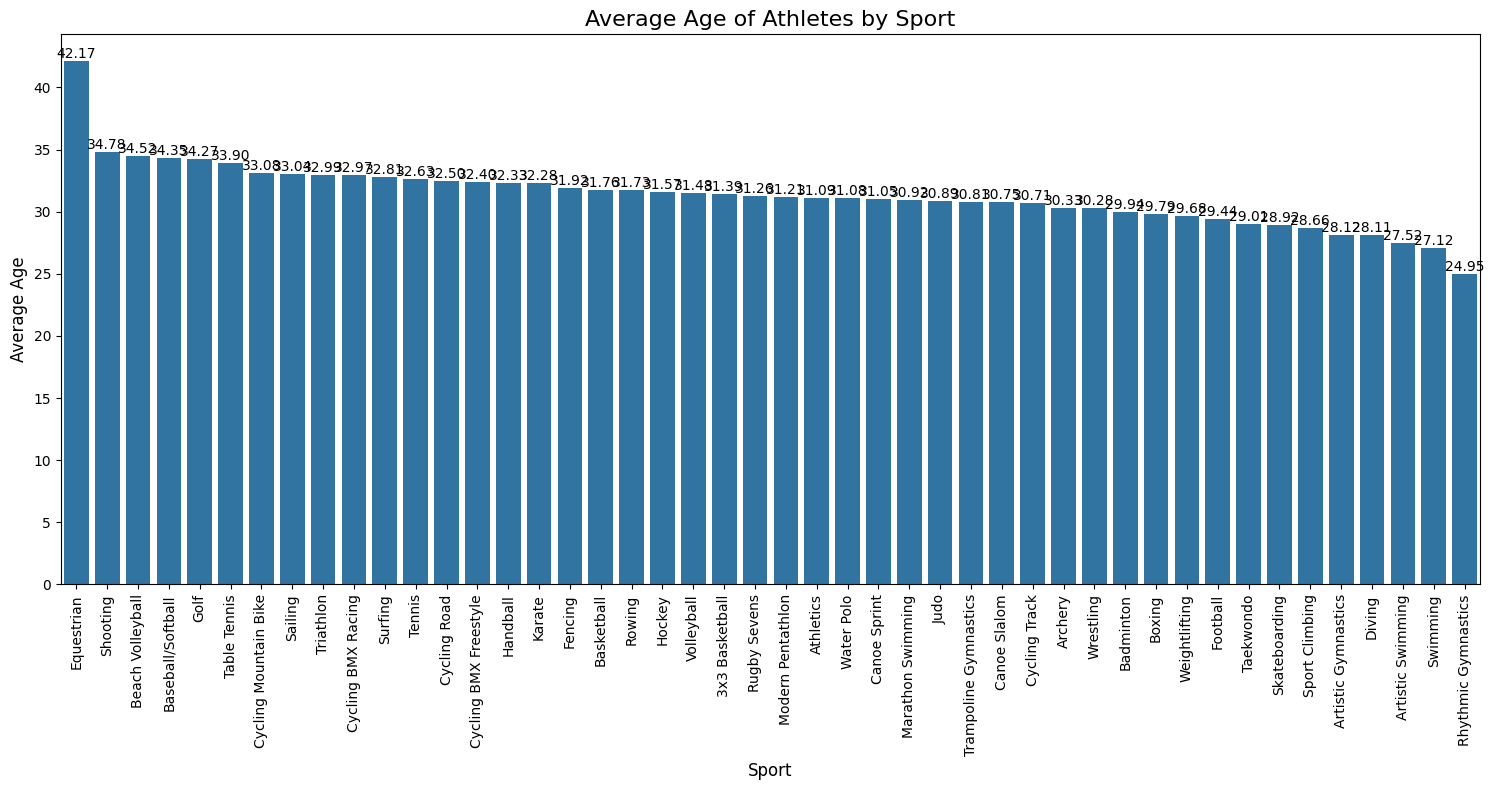


Overall Statistics:
Total number of athletes: 8718
Overall average age: 31.20


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
df1 = pd.read_csv('/content/sample_data/Athletes_Wikidata_FullName_Age .csv')
df2 = pd.read_csv('/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv')

# Merge the dataframes
merged_df = pd.merge(df1, df2, left_on='name', right_on='Name', how='inner')

# Convert 'age' to numeric, replacing non-numeric values with NaN
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

# Filter out NaN values and unreasonable ages (e.g., younger than 10 or older than 100)
merged_df = merged_df[(merged_df['age'].notna()) & (merged_df['age'] >= 10) & (merged_df['age'] <= 100)]

# Calculate average age per sport
avg_age_per_sport = merged_df.groupby('Discipline')['age'].mean().reset_index()
avg_age_per_sport = avg_age_per_sport.sort_values('age', ascending=False)

# Display results
print("Average Age per Sport:")
print(avg_age_per_sport)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Discipline', y='age', data=avg_age_per_sport)
plt.title('Average Age of Athletes by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(avg_age_per_sport['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Calculate and display overall statistics
print("\nOverall Statistics:")
print(f"Total number of athletes: {len(merged_df)}")
print(f"Overall average age: {merged_df['age'].mean():.2f}")


In [ ]:
import pandas as pd
import plotly.express as px

# Reading the CSV file
csv_file_path = '/content/sample_data/Athletes_Wikidata_FullName_Age .csv'
df = pd.read_csv(csv_file_path)

# Converting the age column to a numeric type and handling invalid values
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

# Data filtering for ages up to 50
df_filtered = df[df['age'] <= 50]

# Calculation of the number of columns in the histogram
num_bins = 50 # The number of columns equals the number of ages

# Creating an age distribution graph
fig = px.histogram(df_filtered, x='age', nbins=num_bins,
                   title='Age Distribution of Athletes (Up to 50 Years)',
                   labels={'age': 'Age'})

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of Athletes',
    xaxis_range=[0, 50]  # Limit the X-axis to 50
)

# Display the graph
fig.show()




Loading the vikidata into scv
****אין צורך להריץ את הקוד הנתונים נטענו לקובץ CSV ואין צורך להטעין בשנית , זמן ההרצה מעל ל3 שעות

In [ ]:
import pandas as pd
import requests
from datetime import datetime
from time import sleep
import os

# Wikidata API URL
wikidata_api_url = "https://www.wikidata.org/w/api.php"

# Defining file paths
base_dir = '/content'
processed_file_path = os.path.join(base_dir, 'Athletes_Wikidata_FullName_Age.csv')
not_found_file_path = os.path.join(base_dir, 'Not_Found_Names.txt')



# Gender mappings from Wikidata IDs to human-readable strings
gender_map = {
    'Q6581097': 'Male',
    'Q6581072': 'Female'
}

def search_wikidata(name):
    """Searching Wikidata for a full name and getting an ID if it exists"""
    params = {
        'action': 'wbsearchentities',
        'format': 'json',
        'search': name,
        'language': 'en',
        'limit': 1 # Search one result
    }
    response = requests.get(wikidata_api_url, params=params)
    if response.status_code != 200:
        print(f"Failed to search wikidata for{name},HTTP status code: {response.status_code}")
        return None

    data = response.json()
    search_results = data.get('search', [])
    if search_results:
        entity_id = search_results[0].get('id')
        return entity_id
    return None

def get_wikidata_info(wikidata_id):
  """Getting details from Wikidata for a given ID"""
    params = {
        'action': 'wbgetentities',
        'format': 'json',
        'ids': wikidata_id,
        'props': 'claims|labels'
    }
    response = requests.get(wikidata_api_url, params=params)
    if response.status_code != 200:
        print(f"Failed to get details from wikidata for{wikidata_id}, HTTP status code: {response.status_code}")
        return None

    data = response.json()
    entity = data.get('entities', {}).get(wikidata_id, {})
    if not entity:
        return None

    claims = entity.get('claims', {})
    labels = entity.get('labels', {}).get('en', {}).get('value', 'Unknown')
    birth_date = claims.get('P569', [{}])[0].get('mainsnak', {}).get('datavalue', {}).get('value', {}).get('time', None)
    gender_id = claims.get('P21', [{}])[0].get('mainsnak', {}).get('datavalue', {}).get('value', {}).get('id', 'Unknown')
    gender = gender_map.get(gender_id, 'Unknown')

    return {
        'full_name': labels,
        'birth_date': birth_date,
        'gender': gender,
        'wikidata_id': wikidata_id
    }

def calculate_age(birth_date):
  """Calculation of age from date of birth"""
    if not birth_date:
        return None

    try:
      # Treatment of different formats of date of birth
        if birth_date.startswith('+'):
            birth_date = birth_date[1:]
        if 'T' in birth_date:
            birth_date = birth_date.split('T')[0]

        birth_date_obj = datetime.strptime(birth_date, '%Y-%m-%d')
        current_year = datetime.now().year
        return current_year - birth_date_obj.year
    except ValueError:
        try:
            birth_date_obj = datetime.strptime(birth_date, '%d %B %Y')
            current_year = datetime.now().year
            return current_year - birth_date_obj.year
        except ValueError:
            print(f"Error parsing birth_date: {birth_date}")
            return None

def process_athletes(file_path, processed_file_path, not_found_file_path):
   """Processing the list of athletes to obtain Wikidata information"""
    final_results = []
    not_found_names = []

    # Reading the CSV file
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return final_results

    # Load previous results if any
    if os.path.exists(processed_file_path):
        processed_df = pd.read_csv(processed_file_path)
        processed_names = processed_df['name'].unique().tolist()
    else:
        processed_names = []

    # Load names not found from last time
    if os.path.exists(not_found_file_path):
        with open(not_found_file_path, 'r') as f:
            not_found_names = f.read().splitlines()

    # Processing names you have not yet processed
    for name in df['Name'].dropna().unique():
        if name in processed_names or name in not_found_names: # Skipping names that are already found or not found
            continue

        cleaned_name = clean_name(name)
        reversed_name = reverse_name(cleaned_name)
        print(f"Processing name: {cleaned_name}")

        # Search by full name only
        wikidata_id = search_wikidata(cleaned_name)

       # If not found, search by the reverse name
        if not wikidata_id:
            print(f"Not found for full name: {cleaned_name}, trying reversed name: {reversed_name}")
            wikidata_id = search_wikidata(reversed_name)

        if wikidata_id:
            sleep(2)  # Short pause between requests
            info = get_wikidata_info(wikidata_id)
            if info:
                age = calculate_age(info.get('birth_date'))
                final_results.append({
                    'name': name,
                    'full_name': info.get('full_name', 'Unknown'),
                    'age': age if age is not None else 'Unknown',
                    'gender': info.get('gender', 'Unknown'),
                    'wikidata_id': info.get('wikidata_id')
                })
                print(f"Name: {name}, Full Name: {info.get('full_name')}, Age: {age}, Gender: {info.get('gender')}, Wikidata ID: {info.get('wikidata_id')}")
            else:
                print(f"Name: {name}, Wikidata ID: {wikidata_id}, No detailed info found")
                not_found_names.append(name)
        else:
            print(f"Name: {name}, Wikidata ID: Not found")
            not_found_names.append(name)

    # Saving the new results
    if final_results:
        results_df = pd.DataFrame(final_results, columns=['name', 'full_name', 'age', 'gender', 'wikidata_id'])
        if os.path.exists(processed_file_path):
            results_df.to_csv(processed_file_path, mode='a', header=False, index=False)
        else:
            results_df.to_csv(processed_file_path, index=False)# Create a new file

    # Saving of names not found
    if not_found_names:
        with open(not_found_file_path, 'w') as f:
            for name in not_found_names:
                f.write(name + '\n')

    return final_results

def clean_name(name):
    """Cleaning the name from unnecessary letters"""
    return ' '.join(name.strip().split())

def reverse_name(name):
   """Changing the name format from 'last name first name' to 'first name last name'"""
    parts = name.split()
    if len(parts) > 1:
        return ' '.join(reversed(parts))
    return name

# Path to the CSV file
athletes_csv = '/content/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/Athletes.csv'
processed_file_path = '/mnt/data/Athletes_Wikidata_FullName_Age.csv'
not_found_file_path = '/mnt/data/Not_Found_Names.txt'

results = process_athletes(athletes_csv, processed_file_path, not_found_file_path)

# Saving to a new CSV file every 100 records and merging with the main file
max_records_num = 100
for i in range(0, len(results), max_records_num):
    batch = results[i:i + max_records_num]
    results_df = pd.DataFrame(batch, columns=['name', 'full_name', 'age', 'gender', 'wikidata_id'])
    if i == 0 and not os.path.exists(processed_file_path):
        results_df.to_csv(processed_file_path, index=False) # Create a new file
    else:
        results_df.to_csv(processed_file_path, mode='a', header=False, index=False)  # Adding to the existing file
    print(f"Batch {i // max_records_num + 1} saved to {processed_file_path}")

if not results:
    print("No results to save.")

Distribution of athletes by gender

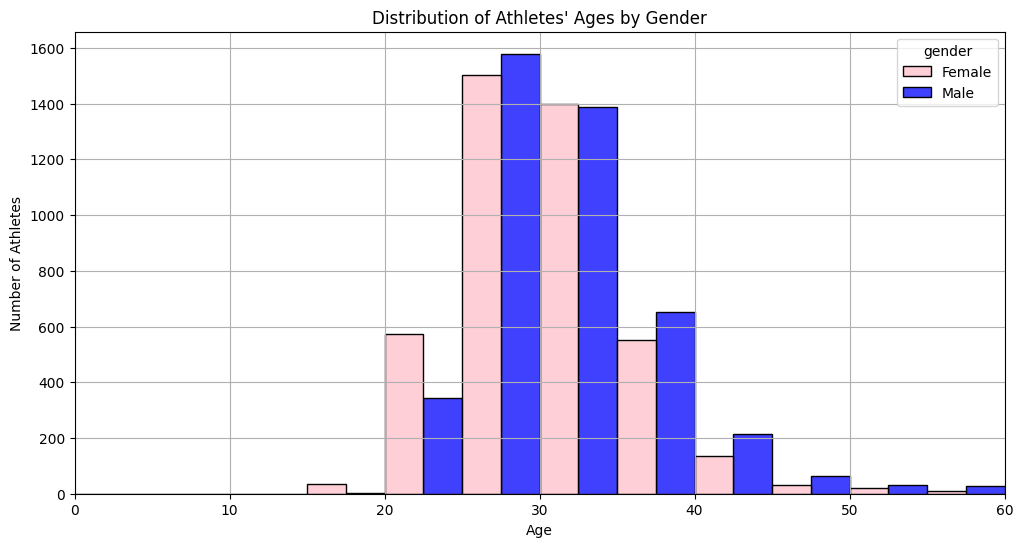

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data from the file
df = pd.read_csv('/content/sample_data/Athletes_Wikidata_FullName_Age .csv')

# Converting the age column to integers
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Filtering out unrealistic ages
df_filtered = df[(df['age'] >= 0) & (df['age'] <= 100)]

# Filtering data only for known categories
df_known_gender = df_filtered[df_filtered['gender'].isin(['Female', 'Male'])]

# Creating a histogram with custom colors
plt.figure(figsize=(12, 6))
sns.histplot(data=df_known_gender, x='age', hue='gender', multiple='dodge', bins=range(0, 101, 5), kde=False, palette={'Female': 'pink', 'Male': 'blue'})
plt.title("Distribution of Athletes' Ages by Gender")
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.xlim(0, 60)
plt.grid(True)
plt.show()

In [ ]:
# Replace with the path where your CSV is stored
file_path = '/content/sample_data/Athletes_Wikidata_FullName_Age .csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
df.head()

,name,full_name,age,gender,wikidata_id
0,AALERUD Katrine,Katrine Aalerud,30,Female,Q26911840
1,ABAD Nestor,Néstor Abad,31,Male,Q23542534
2,ABAGNALE Giovanni,Giovanni Abagnale,29,Male,Q22966926
3,ABALDE Alberto,Alberto Abalde,29,Male,Q19845456
4,ABALDE Tamara,Tamara Abalde,35,Female,Q2705915
